# Summary
Convolutional Neural Networks
- Narrow focus to a small (3x3, 5x5) window
- Scan every NxN region of the image separately
- Learn features independently of their location in the image

Convnet Model
- The 'depth' of a convnet is the number of features it can recognize in one window-sized region. 
- The output dimensionality is smaller because the window doesn't fit on the 'border' pixels (e.g. 128x128 run through a 3x3 convnet produces a 126x126 output)
- Add 'pooling' layers, which reduce e.g. 4px to 1, between convnets so the window covers a larger region, and features can be extracted from a larger region. Also reduces number of parameters.
- Add 1 or more dense layers at the end to convert basic representations into the outputs (e.g. category).

Data Augmentation
- For small datasets, rotate, flip, scale, etc. each image differently for each pass.

Pre-trained Models
- Train a new classifier on top of an old convnet. This way you can re-use the feature extraction, and train the model to make sense of those features.

We can visualize exactly what each layer/filter of the convnet does.
- **Visualize layer/filter output for some input**
  1. Predict some image
  2. Get the output of a particular layer/filter
  3. Plot it
- **Visualize what a layer does by gradient *ascent***.
  1. Generate an image of random gray noise
  2. Isolate the output for one layer/filter
  3. Calculate the loss (mean of layer/filter outputs)
  4. Calculate the gradient of loss w/r/t generated image
  5. Update image along gradient
  6. Repeat until loss is minimized
- **Generate heatmap of which area of the image led to the classification**.
  1. Predict some image
  2. Get gradients for one layer/filter w/r/t predicted image
  3. Multiply final layer output by gradients
  4. Plot image with heatmap overlaid

# Convolutions
Defined by 2 key parameters:
- Size of patches extracted from inputs ((3, 3) or (5, 5))
- Depth of the output feature map (32 or 64)

`layer.Conv2D(output_depth, (window_height, window_width))`



In [2]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [5]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 44s 45ms/step - loss: 0.1697 - accuracy: 0.9478
Epoch 2/5
938/938 [==============================] - 45s 48ms/step - loss: 0.0465 - accuracy: 0.9856
Epoch 3/5
938/938 [==============================] - 45s 48ms/step - loss: 0.0323 - accuracy: 0.9901
Epoch 4/5
938/938 [==============================] - 57s 61ms/step - loss: 0.0242 - accuracy: 0.9924
Epoch 5/5
938/938 [==============================] - 50s 53ms/step - loss: 0.0191 - accuracy: 0.9943


In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy:', test_acc, 'Loss:', test_loss)

313/313 [==============================] - 2s 7ms/step - loss: 0.0309 - accuracy: 0.9909
Accuracy: 0.9908999800682068 Loss: 0.030908670276403427


# Cats and Dogs
### 1. Get data, sort into train, validation and test sets

In [3]:
import os, shutil

# Make directories to hold train, validation and test sets
base_dir = '/Users/grant/chollet/cats_and_dogs_small'
os.mkdir(base_dir)
def make_get_dir(name, base):
    _dir = os.path.join(base, name)
    os.mkdir(_dir)
    return _dir

train_dir = make_get_dir('train', base_dir)
validation_dir = make_get_dir('validation', base_dir)
test_dir = make_get_dir('test', base_dir)

train_cats_dir = make_get_dir('cats', train_dir)
train_dogs_dir = make_get_dir('dogs', train_dir)
validation_cats_dir = make_get_dir('cats', validation_dir)
validation_dogs_dir = make_get_dir('dogs', validation_dir)
test_cats_dir = make_get_dir('cats', test_dir)
test_dogs_dir = make_get_dir('dogs', test_dir)    

In [5]:
# Downloaded from https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
original_dataset_dir = '/Users/grant/chollet/kagglecatsanddogs_3367a/PetImages'

for i in range(1000):
    src = os.path.join(original_dataset_dir, f'Cat/{i}.jpg')
    dst = os.path.join(train_cats_dir, f'cat.{i}.jpg')
    shutil.copyfile(src, dst)
for i in range(1000, 1500):
    src = os.path.join(original_dataset_dir, f'Cat/{i}.jpg')
    dst = os.path.join(validation_cats_dir, f'cat.{i}.jpg')
    shutil.copyfile(src, dst)
for i in range(1500, 2000):
    src = os.path.join(original_dataset_dir, f'Cat/{i}.jpg')
    dst = os.path.join(test_cats_dir, f'cat.{i}.jpg')
    shutil.copyfile(src, dst)
    
for i in range(1000):
    src = os.path.join(original_dataset_dir, f'Dog/{i}.jpg')
    dst = os.path.join(train_dogs_dir, f'dog.{i}.jpg')
    shutil.copyfile(src, dst)
for i in range(1000, 1500):
    src = os.path.join(original_dataset_dir, f'Dog/{i}.jpg')
    dst = os.path.join(validation_dogs_dir, f'dog.{i}.jpg')
    shutil.copyfile(src, dst)
for i in range(1500, 2000):
    src = os.path.join(original_dataset_dir, f'Dog/{i}.jpg')
    dst = os.path.join(test_dogs_dir, f'dog.{i}.jpg')
    shutil.copyfile(src, dst)

In [12]:
dirs = [train_cats_dir, train_dogs_dir,
        validation_cats_dir, validation_dogs_dir,
        test_cats_dir, test_dogs_dir]
for _dir in dirs:
    set_name, animal_name = f'{_dir=}'.split('/')[-2:]
    print(set_name, animal_name[:-1], 'images:', len(os.listdir(_dir)))

train cats images: 1000
train dogs images: 1000
validation cats images: 501
validation dogs images: 500
test cats images: 500
test dogs images: 500


### 2. Build the model

In [13]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

2022-03-03 09:20:40.438326: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [17]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

### 3. Data preprocessing
1. Read the picture files
2. Decode .jpg content into rgb grids of pixels
3. Convert these into floating-point tensors
4. Rescale pixel values from [0, 255] to [0, 1]

Keras has a built-in module to do all of this: `ImageDataGenerator`.

In [32]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [33]:
history = model.fit( # Keras used to have 'fit_generator', deprecated
    train_generator, # Expects a generator that produces batches
    steps_per_epoch=100, # Req b/c generator yields indefinitely
    epochs=5, # Should be much higher, but no GPU :(
    validation_data=validation_generator,
    validation_steps=50)
model.save('cats_and_dogs_small_1.h5')

Epoch 1/5
100/100 [==============================] - 77s 766ms/step - loss: 0.6248 - acc: 0.6455 - val_loss: 0.6470 - val_acc: 0.6120
Epoch 2/5
100/100 [==============================] - 81s 813ms/step - loss: 0.5874 - acc: 0.6945 - val_loss: 0.5959 - val_acc: 0.6680
Epoch 3/5
100/100 [==============================] - 76s 758ms/step - loss: 0.5479 - acc: 0.7230 - val_loss: 0.6220 - val_acc: 0.6680
Epoch 4/5
100/100 [==============================] - 75s 753ms/step - loss: 0.5239 - acc: 0.7365 - val_loss: 0.5778 - val_acc: 0.6980
Epoch 5/5
100/100 [==============================] - 78s 783ms/step - loss: 0.4982 - acc: 0.7620 - val_loss: 0.5846 - val_acc: 0.6860


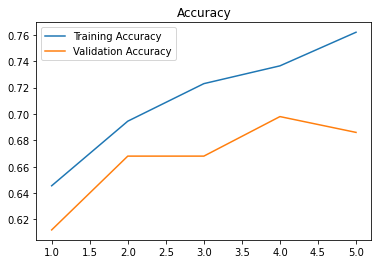

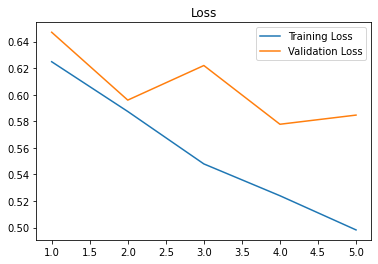

In [35]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plots = [(acc, val_acc, 'Accuracy'), (loss, val_loss, 'Loss')]
for train, validation, label in plots:
    plt.plot(epochs, train, 'bo', label=f'Training {label}')
    plt.plot(epochs, validation, 'b', label=f'Validation {label}')
    plt.title(label)
    plt.legend()
    plt.show()

### Data Augmentation
Distort the original images to generate new training samples via
rotate, shift, shear, zoom, flip and fill.

The network will never see the same input twice, but the inputs are highly related. 

To further fight overfitting, combine with dropout right before Dense layer.

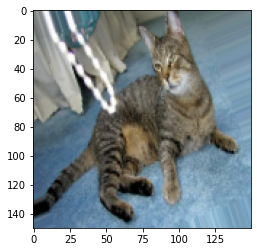

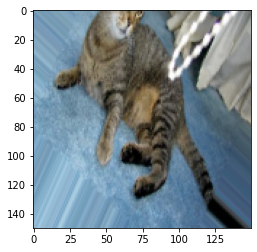

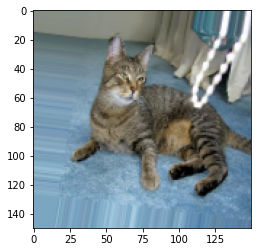

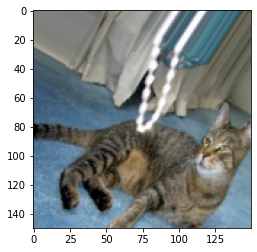

In [36]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for 
          fname in os.listdir(train_cats_dir)]

img_path = fnames[3] # Choose one to augment
img = image.load_img(img_path, target_size=(150, 150)) # Read & Resize
x = image.img_to_array(img) # Convert to numpy array
x = x.reshape((1,) + x.shape) # Put into a list of 1
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

In [37]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # <--
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [39]:
# PREPARE GENERATORS
# Note that test data shouldn't be augmented
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)

# BUILD GENERATORS
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50)
model.save('cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 [==============================] - 78s 782ms/step - loss: 0.6868 - acc: 0.5340 - val_loss: 0.6682 - val_acc: 0.5770
Epoch 2/20
100/100 [==============================] - 80s 803ms/step - loss: 0.6725 - acc: 0.5765 - val_loss: 0.6714 - val_acc: 0.5590
Epoch 3/20
100/100 [==============================] - 85s 847ms/step - loss: 0.6657 - acc: 0.5940 - val_loss: 0.6999 - val_acc: 0.5420
Epoch 4/20
100/100 [==============================] - 83s 824ms/step - loss: 0.6543 - acc: 0.6045 - val_loss: 0.6797 - val_acc: 0.5710
Epoch 5/20
100/100 [==============================] - 81s 813ms/step - loss: 0.6456 - acc: 0.6135 - val_loss: 0.6207 - val_acc: 0.6360
Epoch 6/20
100/100 [==============================] - 84s 833ms/step - loss: 0.6397 - acc: 0.6270 - val_loss: 0.6107 - val_acc: 0.6640
Epoch 7/20
100/100 [==============================] - 84s 834ms/step - loss: 0.6242 - acc: 0.6385 - val_lo

KeyboardInterrupt: 

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plots = [(acc, val_acc, 'Accuracy'), (loss, val_loss, 'Loss')]
for train, validation, label in plots:
    plt.plot(epochs, train, label=f'Training {label}')
    plt.plot(epochs, validation, label=f'Validation {label}')
    plt.title(label)
    plt.legend()
    plt.show()

# Using a pretrained Convnet
A pretrained network is a saved network that was trained on a large dataset. It will contain spatial heirarchy features that can be useful for new problems.

There are two ways to use pretrained networks:
1. Feature Extraction. Use pretrained convent to extract interesting features, and train a new classifier from the features.
2. Fine-tuning. 'Unfreeze' the last convolutional layer, and train it along with the new classifier.

**NOTE**: This section requires tons of compute; run with a GPU or in a cloud container.

### Feature Extraction
Convnets consist of two parts:
1. Convolutional and Pooling layers, **convolutional base**
2. Flatten and Dense layers, **classifier**

Each successive layer of the convolutional base is *less generic*, so depending on how similar your data is to the original data, you may only use the first few layers.

In [3]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',  # The weight checkpoint form which to initialize
                  include_top=False,  # Whether or not to include classifier
                  input_shape=(150, 150, 3))  # Optional
conv_base.summary()

2022-03-05 12:00:46.942761: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


58900480/58889256 [==============================] - 7s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

Two ways to proceed:

Cheap: Run the convolutional base over the dataset, save the output, and use that data as input to a standalone classifier.
Expensive: Extend the convolutional base by adding Dense layers. This allows use of data augmentation, because each augmented image is passed through the convolutional base.

In [ ]:
# Cheap: Feature Extraction without Data Augmentation
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/tmp/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512)) # Match the model output
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(
      directory,
      target_size=(150, 150),
      batch_size=batch_size,
      class_mode='binary')
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
      break
  return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

In [ ]:
# Features have shape (4, 4, 512); need to convert to (8192, ) for our dense layer
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [ ]:
from keras import models
from keras import layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(train_features, train_labels, epochs=30, batch_size=20,
          validation_data=(validation_features, validation_labels),
          verbose=0)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plots = [(acc, val_acc, 'Accuracy'), (loss, val_loss, 'Loss')]
for train, validation, label in plots:
    plt.plot(epochs, train, 'bo', label=f'Training {label}')
    plt.plot(epochs, validation, 'b', label=f'Validation {label}')
    plt.title(label)
    plt.legend()
    plt.show()

In [ ]:
# EXPENSIVE: Add the conv_base as a layer to a new model
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Need to 'freeze' the convolutional base, so its weights aren't adjusted
print('trainable weights before freezing:', len(model.trainable_weights))
conv_base.trainable = False
print('trainable weights after freezing:', len(model.trainable_weights))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=30,
                    validation_data=validation_generator,
                    validation_steps=50)

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plots = [(acc, val_acc, 'Accuracy'), (loss, val_loss, 'Loss')]
for train, validation, label in plots:
    plt.plot(epochs, train, 'bo', label=f'Training {label}')
    plt.plot(epochs, validation, 'b', label=f'Validation {label}')
    plt.title(label)
    plt.legend()
    plt.show()

### FINE-TUNING
Retrain the top-most layer(s) of the convolutional base.

Just as earlier we had to freeze the conv_base when training the classifier, now we must use a pre-trained classifier. Otherwise the 'errors' from the randomly-initialized classifier will propogate into the convolutional layer.

So the steps to fine-tuning are:
1. Add custom network to pre-trained conv_base
2. Freeze the conv_base
3. Train the part you added (classifier)
4. Unfreeze some layers in the conv_base
5. Jointly train conv_base layers and classifier

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable == True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

# Proceed with a *SMALL* learning rate
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['acc'])
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=5)

def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plots = [(acc, val_acc, 'Accuracy'), (loss, val_loss, 'Loss')]
for train, validation, label in plots:
    plt.plot(epochs, smooth_curve(train), 'bo', label=f'Training {label}')
    plt.plot(epochs, smooth_curve(validation), 'b', label=f'Validation {label}')
    plt.title(label)
    plt.legend()
    plt.show()